In [2]:
'''
LOGISTIC   REGRESSION
Adapted From example given in Chapter 4 of 
Introduction to Statistical Learning
Data: Default Data Set
'''

import pandas as pd
import numpy as np

#we're using a new odule from sklearn.linear_model called LogisticRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

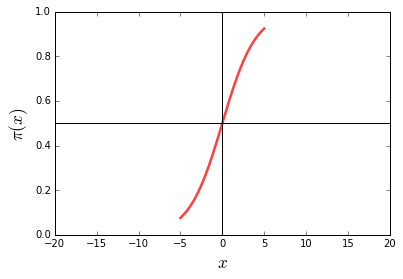

In [9]:
'''
QUIZ: UNDERSTANDING THE BASIC SHAPE
http://matplotlib.org/users/mathtext.html
'''
x = np.linspace(-5, 5, 400)
beta = [0, 0.5]
y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))

# Plotting
plt.plot(x, y, 'r', alpha=0.75, linewidth=2.5)
plt.plot([0,0], [0, 1], 'k')
plt.plot([-20,20], [0.5, 0.5], 'k')
plt.xlabel(r'$x$', fontsize='xx-large')
plt.ylabel(r'$\pi(x)$', fontsize='xx-large')

In [11]:
'''
PART I - Exploration
'''

# 1 - Read in Default.csv and convert all data to numeric
d = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-11/datasets/Default.csv')
d.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [12]:
d.describe()

,default,balance,income
count,10000.000000,10000.000000,10000.000000
mean,0.033300,835.374886,33516.981876
std,0.179428,483.714985,13336.639563
min,0.000000,0.000000,771.967729
25%,0.000000,481.731105,21340.462905
50%,0.000000,823.636973,34552.644800
75%,0.000000,1166.308387,43807.729275
max,1.000000,2654.322576,73554.233500


In [18]:
# Convert everything to numeric before splitting
if (d.dtypes['student'] != np.int):
    d.student = np.where(d.student == 'Yes', 1, 0)

# 2 - Split the data into train and test sets
X = d[['balance','student','income']]
y = d.default
# random_state is just a seed value for the initial state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
# Convert them back into dataframes, for convenience
train = pd.DataFrame(data=X_train, columns=['balance','student','income'])
train['default'] = y_train

test = pd.DataFrame(data=X_test, columns=['balance','student','income'])
test['default'] = y_test

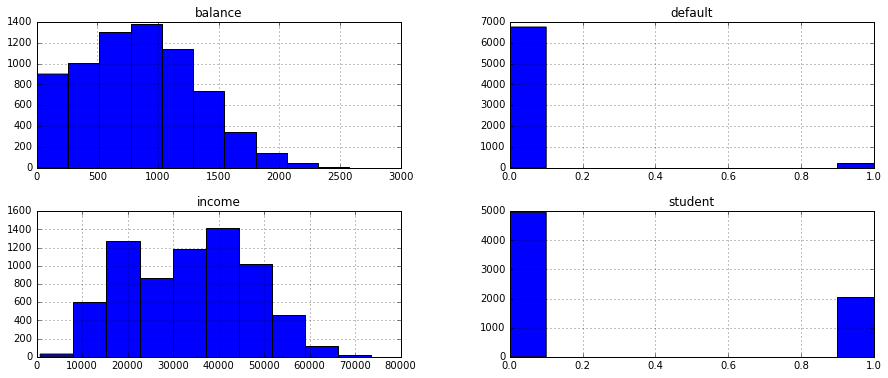

In [17]:
# pd.scatter_matrix(train, figsize=(20, 20))
# 
# 3 - Create a histogram of all variables


train.hist(figsize=(15, 6));

(0, 2800)

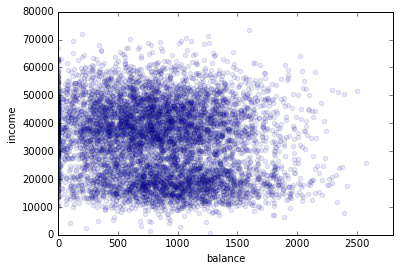

In [20]:
# 4 - Create a scatter plot of the income vs. balance
train.plot(x='balance', y='income', kind='scatter', alpha=0.1)
plt.ylim([0,80000]); plt.xlim([0, 2800])

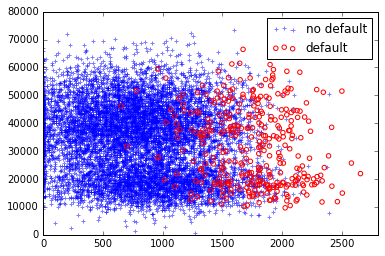

In [21]:
# 5 - Mark defaults with a different color and symbol
train_nd = d[d.default == 0]
train_d = d[d.default == 1]

plt.figure()

plt.scatter(train_nd.balance, train_nd.income, alpha = .5, marker='+', c= 'b')
plt.scatter(train_d.balance, train_d.income, marker='o', edgecolors = 'r', facecolors = 'none')
plt.ylim([0,80000]); plt.xlim([0, 2800])
plt.legend( ('no default', 'default'), loc='upper right');

#### What can you infer from this plot?
*It appears that the balance is more correlated with default than income*

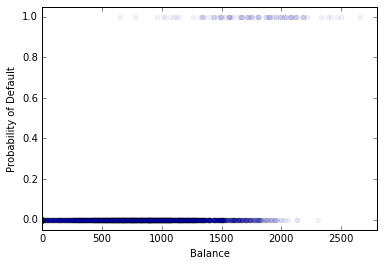

In [30]:
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.05)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800]);

In [23]:
'''
PART II: Training the Model
'''

# 1 - Run a logistic regression on the balance variable
# 2 - Is the beta  value associated with balance significant?
balance = LogisticRegression() # model for classification

balance.fit(train[['balance']], y_train) # fitting model to x predictor and training outcomes (setting params of model)
B1 = balance.coef_[0][0] # returning the coefficient of the predictor variable
B0 = balance.intercept_[0] # returning intercept value
np.exp(B1)

print "Beta1", B1
print "Beta0", B0

Beta1 0.0042979750671
Beta0 -8.60113298968


In [24]:
balance.predict?

In [45]:
plt.subplot?

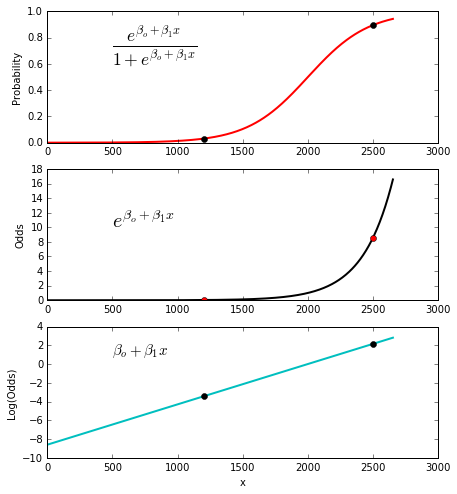

In [50]:
# Beta is significant!
# 2 - Predict the probability of default for someone with a balance of $1.2k and $2.5k
prob = balance.predict(pd.DataFrame({'balance': [1200, 2500]}))

# What does beta mean? Let's create some plots to find out!
x = np.linspace(test.balance.min(), test.balance.max(),500)
beta = [B0,B1]

y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))
odds = np.exp(beta[0] + beta[1]*x)
log_odds = beta[0] + beta[1]*x

# Plot the probability
plt.figure(figsize=(7, 8))
plt.subplot(311)
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{e^{\beta_o + \beta_1x}}{1+e^{\beta_o + \beta_1x}}$', fontsize=25)

# plot the odds
plt.subplot(312)
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 10, r'$e^{\beta_o + \beta_1x}$', fontsize=20)

# Plot the log odds
plt.subplot(313)
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 1, r'$\beta_o + \beta_1x$', fontsize=15)

'''
From Page 133 in "Introduction to Statistical Learning"
increasing X by one unit changes the log odds by Beta1, or equivalently
it multiplies the odds by e^Beta1 . However,because the relationship between
p(X) and X in is not a straight line, Beta1 does not correspond to the change
in p(X) associated with a one-unit increase in X. The amount that 
p(X) changes due to a one-unit change in X will depend on the current 
value of X.

Example: In our example, Beta1 = 0.0042979750671040349 ~= 0.0043

Log-odds: 
If you increase x by 1, you increase the log-odds by 0.0043. 
If you increase x by 800, you increase the log-odds by 0.0043*800 = 3.44

If you increase x by 1, you multiply the odds by e^0.0043. 
If you increase x by 800, you mutliply the odds by e^(0.0043*800) = 31.187, not 800 * e^(0.0043)
'''

# Now let's try plotting some points
plt.subplot(311)
pts = np.array([1200, 2500])
ypts = np.exp(beta[0] + beta[1]*pts) / (1 + np.exp(beta[0] + beta[1]*pts))
plt.plot(pts, ypts, 'ko')

plt.subplot(312)
odds_pts = np.exp(beta[0] + beta[1]*pts)
plt.plot(pts, odds_pts, 'ro')

plt.subplot(313)
log_odds_pts = beta[0] + beta[1]*pts
plt.plot(pts, log_odds_pts , 'ko');

In [43]:
def sigmoid(x):
    X = B0 + B1 * x
    probability = 1 / (1 + np.exp(-X))
    return probability

#manually calculating the probabilities

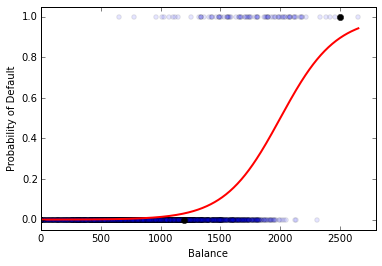

In [79]:
# 3 - Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])
plt.plot([1200, 2500], prob, 'ko');

### Determine the `probability`, `odds`, and `log(odds)` of defaulting for accounts with the following balance:

### balance = 500

In [51]:
def probability(balance):
    prob = 1 / (1 + np.exp((-B0 - B1 * balance)))
    return prob

def odds(balance):
    odds = np.exp(B0) + B1 * balance
    return odds

def log_odds(balance): # fundamental relationship between sigmoid and log odds; log odds is linear regression
    logodds = B0 + B1 * balance
    return logodds

print 'Probability: %.2f' % probability(500)
print 'Odds: %.2f' % odds(500)
print 'Log Odds: %.2f' % log_odds(500)

Probability: 0.00
Odds: 2.15
Log Odds: -6.45


### balance = 1500:

In [52]:
print 'Probability: %.2f' % probability(1500)
print 'Odds: %.2f' % odds(1500)
print 'Log Odds: %.2f' % log_odds(1500)

Probability: 0.10
Odds: 6.45
Log Odds: -2.15


In [61]:
# 4 - Create predictions using the balance model on the test set
test['pred_class'] = balance.predict(test[['balance']])

In [62]:
# 5 - Compute the overall accuracy, the sensitivity and specificity
# Accuracy
accuracy = sum(test.pred_class == test.default) / float(len(test.default))

# Specificity
# For those who didn't default, how many did it predict correctly?
test_nd = test[test.default == 0]
specificity = sum(test_nd.pred_class == test_nd.default) / float(len(test_nd.default))

# Sensitivity
# For those who did default, how many did it predict correctly? 
test_d = test[test.default == 1]
sensitivity = sum(test_d.pred_class == test_d.default) / float(len(test_d.default))

# This raises the question, how does our overall 
# classification accuracy compare to the not-default rate?
null = 1 - sum(d.default) / float(len(d.default))

# This illustrates an important point, class imbalance can result in accuracy
# measures that are misleading. After all, if you would have just guessed not
# going to default, you would be correct 96.67 % of the time.

f1_score = 2 * (sensitivity * specificity) / (sensitivity + specificity)

print accuracy
print "Sensitivity (Aka Recall proportion of actual positives which are correctly - identified): ", sensitivity
print "Specificity (proportion of negatives which are correctly identified): ", specificity

print "F1 Score: ", f1_score

0.976
Sensitivity (Aka Recall proportion of actual positives which are correctly - identified):  0.274725274725
Specificity (proportion of negatives which are correctly identified):  0.997937435545
F1 Score:  0.430842569561
